In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*80)
print("HEART DISEASE RISK PREDICTION DATASET ANALYSIS")
print("="*80)


print("\n1. OBJECTIVES")
print("-" * 50)
objectives = [
    "Analyze patterns in heart disease risk factors and symptoms",
    "Perform clustering analysis to identify patient groups",
    "Build predictive models using regression and KNN algorithms",
    "Examine correlations between different risk factors",
    "Create comprehensive visualizations for data insights",
    "Evaluate model performance for heart disease risk prediction"
]

for i, obj in enumerate(objectives, 1):
    print(f"{i}. {obj}")

HEART DISEASE RISK PREDICTION DATASET ANALYSIS

1. OBJECTIVES
--------------------------------------------------
1. Analyze patterns in heart disease risk factors and symptoms
2. Perform clustering analysis to identify patient groups
3. Build predictive models using regression and KNN algorithms
4. Examine correlations between different risk factors
5. Create comprehensive visualizations for data insights
6. Evaluate model performance for heart disease risk prediction


In [5]:
print("\n\n2. DATA SOURCES AND DATA DESCRIPTION")
print("-" * 50)



2. DATA SOURCES AND DATA DESCRIPTION
--------------------------------------------------


In [7]:
df = pd.read_csv('heart_disease_risk_dataset_earlymed.csv')

expected_columns = ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling',
 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea_Nausea', 'High_BP', 'High_Cholesterol', 'Diabetes',
 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress',
 'Gender', 'Age', 'Heart_Risk']


missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns in dataset: {missing_columns}")
    print(f"Available columns: {list(df.columns)}")
    print("Please check your column names and update the expected_columns list if needed.")

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Available columns: {list(df.columns)}")

print("Dataset Overview:")
print(f"Dataset Shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}")
print(f"Samples: {df.shape[0]}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nTarget Variable Distribution:")
print(df['Heart_Risk'].value_counts())
print(f"Risk Distribution: {df['Heart_Risk'].value_counts(normalize=True)}")

Available columns: ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender', 'Age', 'Heart_Risk']
Please check your column names and update the expected_columns list if needed.
Dataset loaded successfully!
Dataset shape: (70000, 19)
Available columns: ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender', 'Age', 'Heart_Risk']
Dataset Overview:
Dataset Shape: (70000, 19)
Features: 18
Samples: 70000

First 5 rows:
   Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0         0.0                  0.0      0.0           1.0        0.0   
1         0.0    

In [9]:
print("\n\n3. METHODOLOGY / DATA PROCESSING")
print("-" * 50)

print("\n3.1 Data Quality Assessment")
print("Missing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

print("\n3.2 Feature Engineering")

df['symptom_count'] = (df['Chest_Pain'] + df['Shortness_of_Breath'] + df['Fatigue'] + 
                       df['Palpitations'] + df['Dizziness'] + df['Swelling'] + 
                       df['Pain_Arms_Jaw_Back'] + df['Cold_Sweats_Nausea'])

df['risk_factor_count'] = (df['High_BP'] + df['High_Cholesterol'] + df['Diabetes'] + 
                          df['Smoking'] + df['Obesity'] + df['Family_History'])

df['Age_group'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], 
                        labels=['Young', 'Middle-Aged', 'Senior', 'Elderly'])

print("New features created:")
print("- symptom_count: Total number of symptoms")
print("- risk_factor_count: Total number of risk factors")
print("- Age_group: Categorical Age groups")

print("\n3.3 Data Preprocessing for Machine Learning")

feature_cols = [col for col in df.columns if col not in ['Heart_Risk', 'Age_group']]
X = df[feature_cols]
y = df['Heart_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print("Features have been standardized for ML algorithms")



3. METHODOLOGY / DATA PROCESSING
--------------------------------------------------

3.1 Data Quality Assessment
Missing Values:
Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64

Data Types:
Chest_Pain             float64
Shortness_of_Breath    float64
Fatigue                float64
Palpitations           float64
Dizziness              float64
Swelling               float64
Pain_Arms_Jaw_Back     float64
Cold_Sweats_Nausea     float64
High_BP                float64
High_Cholesterol       float64
Diabetes               float64
Smoking                floa



4. RESULTS AND DISCUSSIONS
--------------------------------------------------

4.1 Exploratory Data Analysis


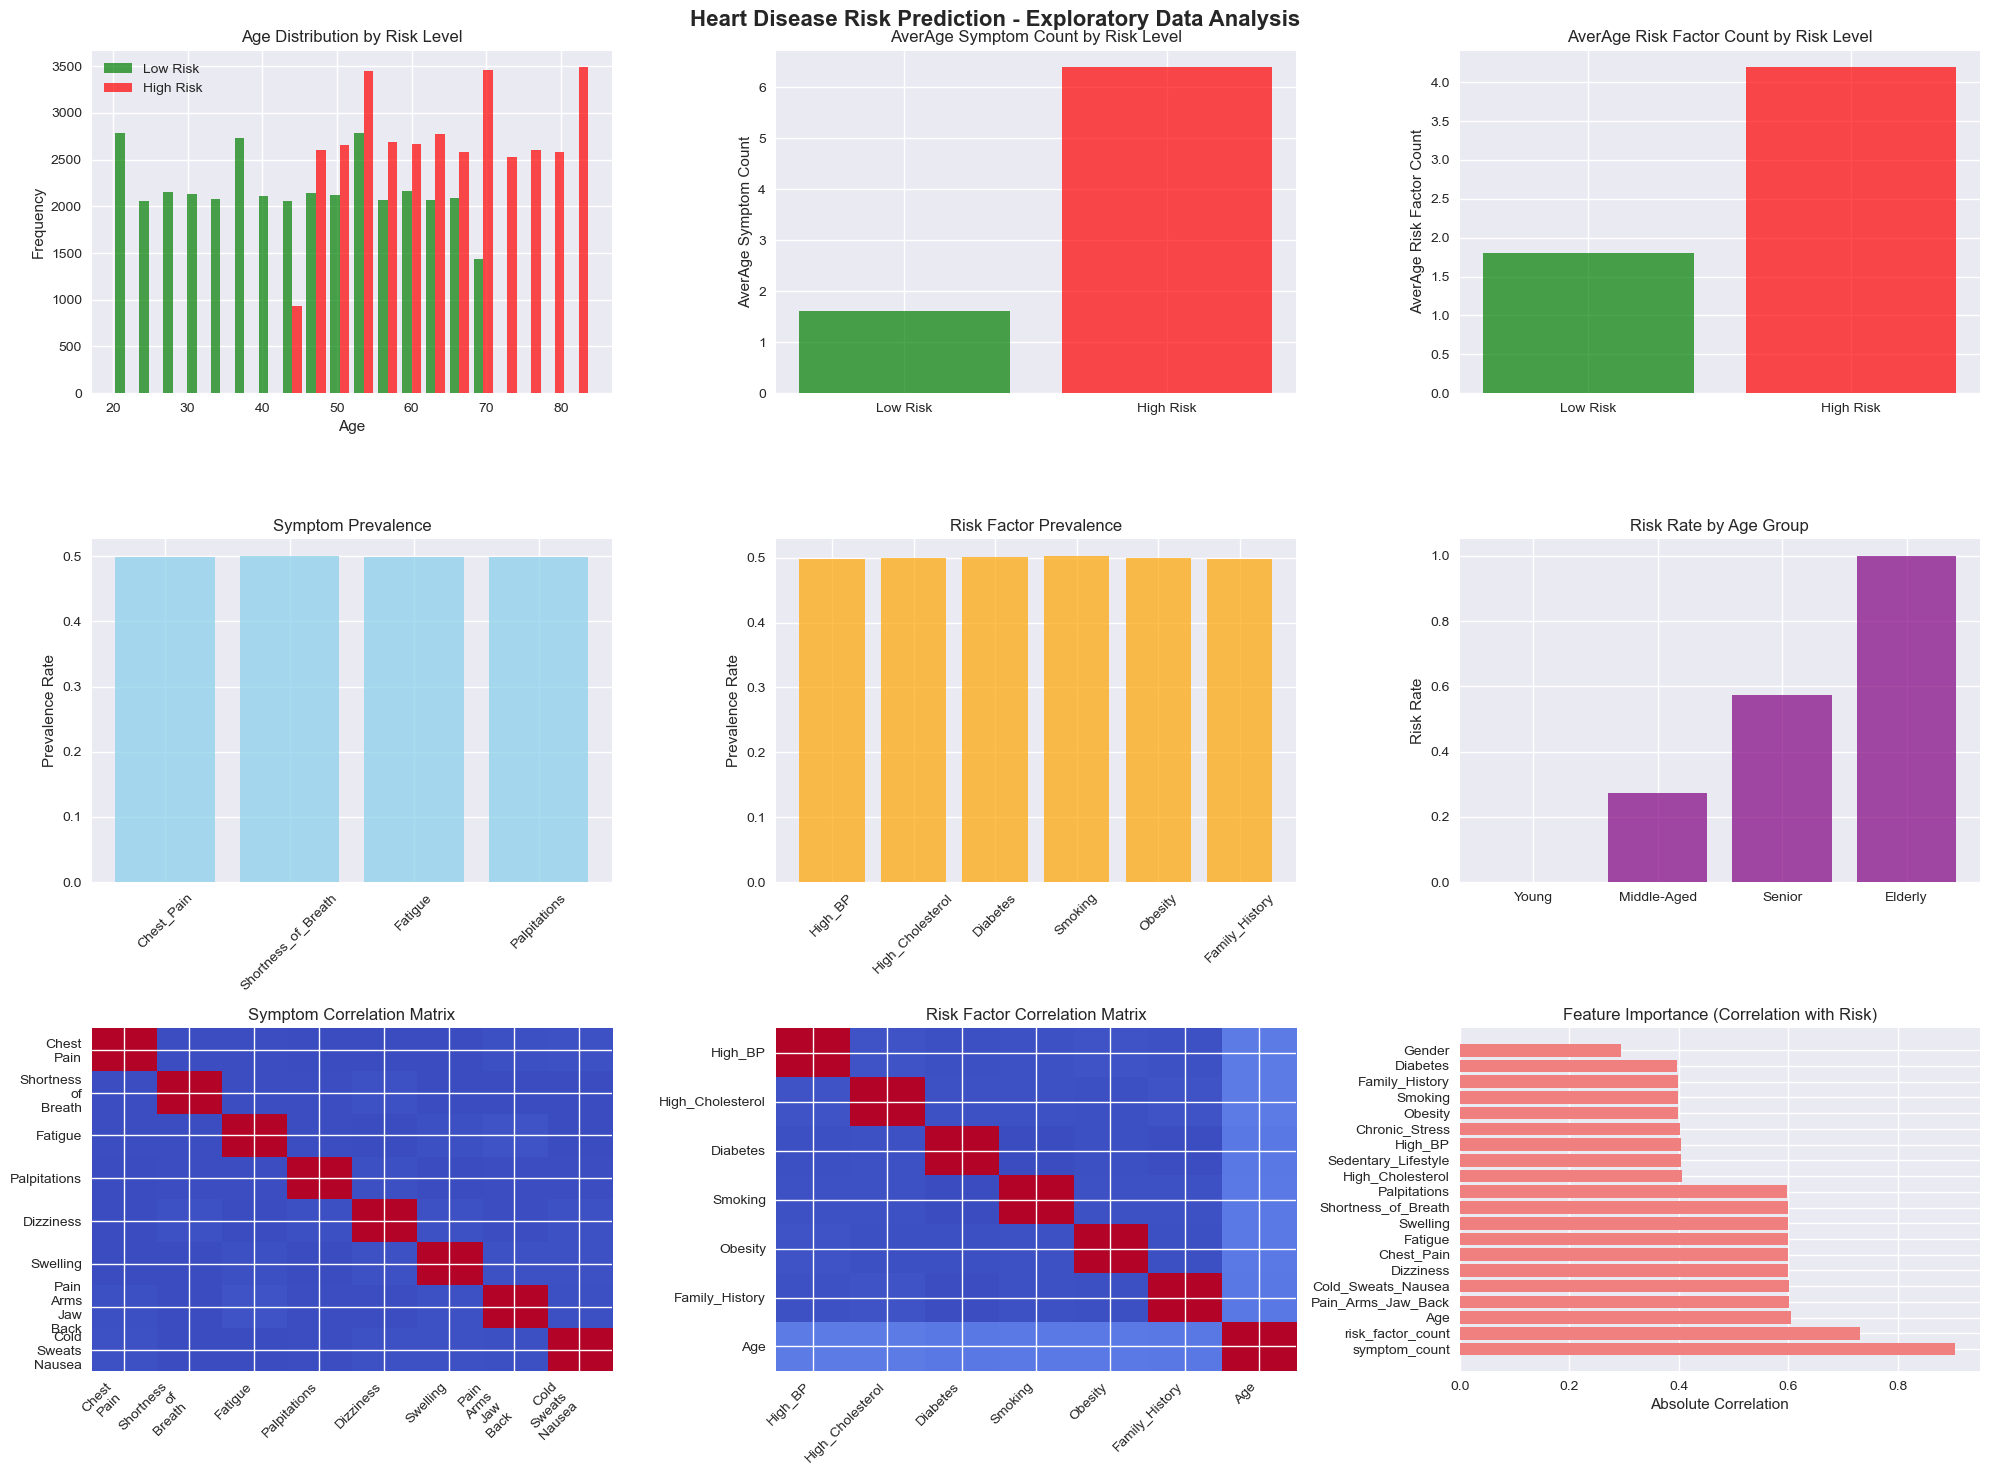


4.2 Correlation Analysis

Correlation with Heart Disease Risk:
symptom_count          0.904583
risk_factor_count      0.731133
Age                    0.605182
Pain_Arms_Jaw_Back     0.601403
Cold_Sweats_Nausea     0.601093
Dizziness              0.600202
Chest_Pain             0.599944
Fatigue                0.599260
Swelling               0.599173
Shortness_of_Breath    0.598772
Palpitations           0.596773
High_Cholesterol       0.405001
Sedentary_Lifestyle    0.404696
High_BP                0.404462
Chronic_Stress         0.401914
Obesity                0.399229
Smoking                0.398007
Family_History         0.397604
Diabetes               0.396086
Gender                 0.293609
dtype: float64

Top 5 Most Correlated Features:
1. symptom_count: 0.905
2. risk_factor_count: 0.731
3. Age: 0.605
4. Pain_Arms_Jaw_Back: 0.601
5. Cold_Sweats_Nausea: 0.601

4.3 Clustering Analysis
Clustering Results:
Number of clusters: 3
Cluster sizes:
Cluster 0: 27818 patients
Cluster 1: 14360

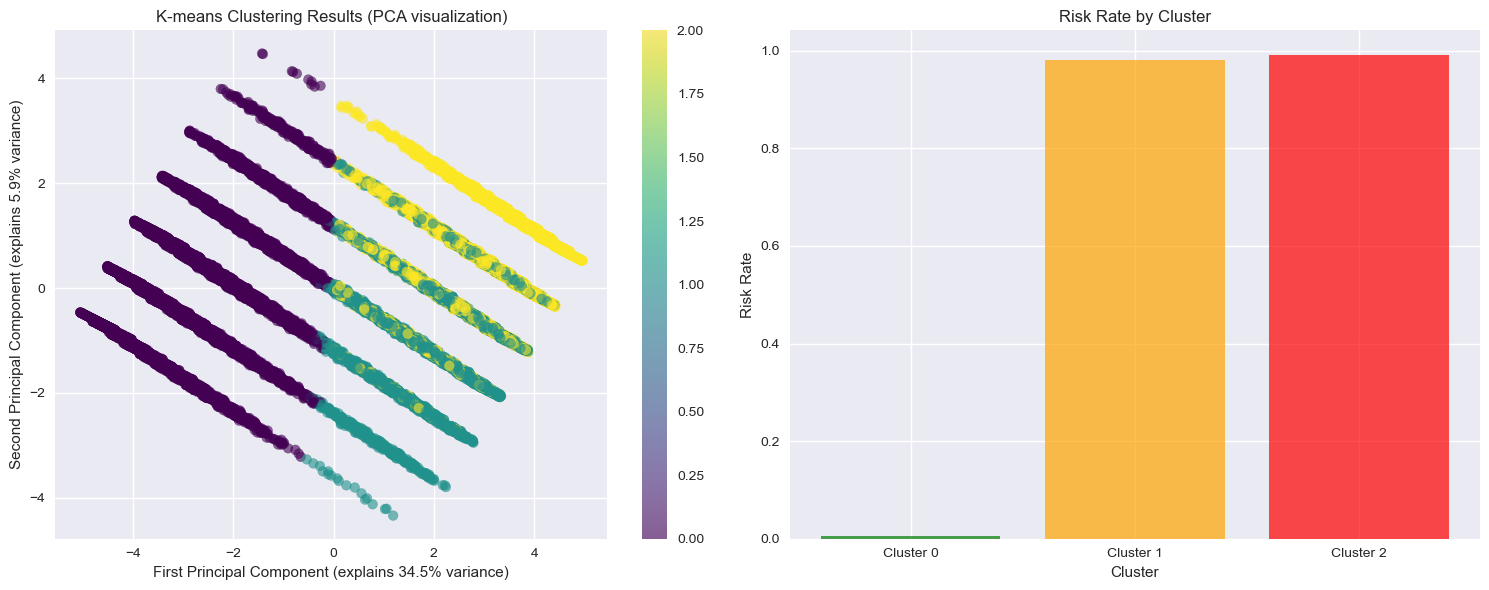


4.4 Machine Learning Models

4.4.1 Logistic Regression
Accuracy: 0.991
AUC Score: 0.999

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      7000
         1.0       0.99      0.99      0.99      7000

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000


4.4.2 K-Nearest Neighbors
Optimal k: 20
Accuracy: 0.991
AUC Score: 0.999

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      7000
         1.0       0.99      0.99      0.99      7000

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000


4.4.3 Random Forest (Additional Model)
Accuracy: 0.993
AUC Score: 0.999

4.5 Model Comparison and Evaluation


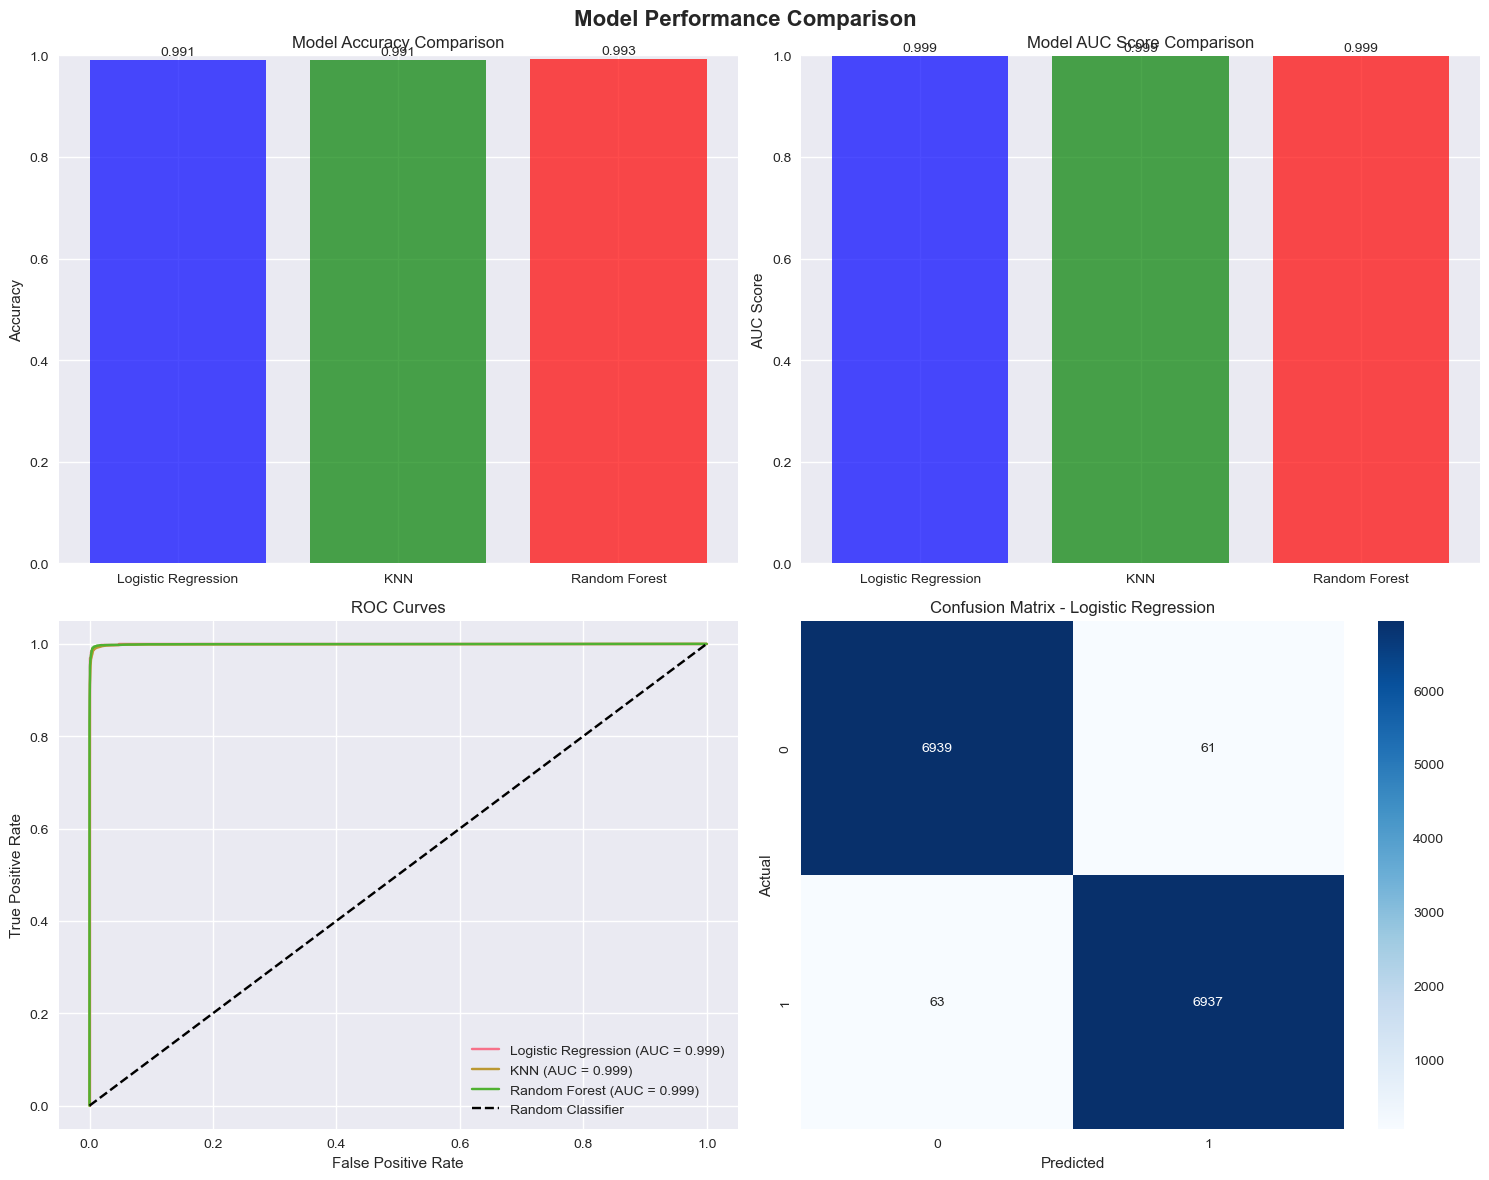


Feature Importance (Random Forest):
                feature  importance
18        symptom_count    0.332814
19    risk_factor_count    0.160940
17                  Age    0.082453
6    Pain_Arms_Jaw_Back    0.069262
7    Cold_Sweats_Nausea    0.062846
2               Fatigue    0.050647
4             Dizziness    0.044352
1   Shortness_of_Breath    0.044012
0            Chest_Pain    0.043265
5              Swelling    0.042093


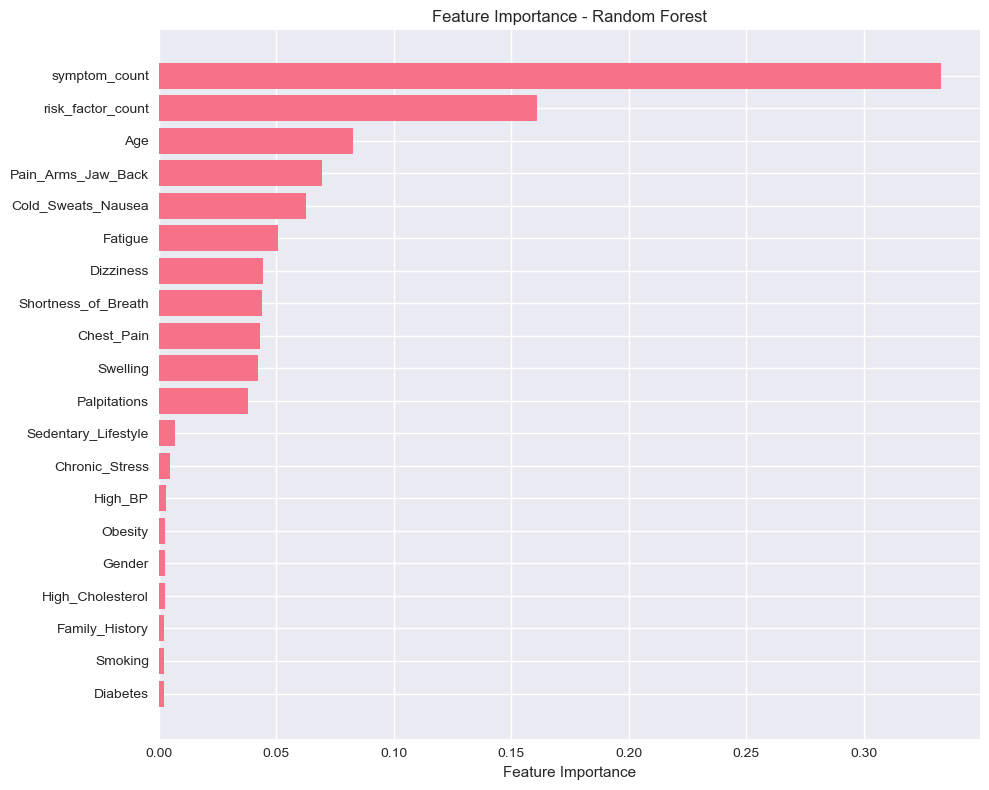


MODEL PERFORMANCE SUMMARY

Logistic Regression:
  Accuracy: 0.991
  AUC Score: 0.999

KNN:
  Accuracy: 0.991
  AUC Score: 0.999

Random Forest:
  Accuracy: 0.993
  AUC Score: 0.999

Best performing model: Logistic Regression
Best AUC Score: 0.999


In [28]:
print("\n\n4. RESULTS AND DISCUSSIONS")
print("-" * 50)

print("\n4.1 Exploratory Data Analysis")

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Heart Disease Risk Prediction - Exploratory Data Analysis', fontsize=16, fontweight='bold')

axes[0, 0].hist([df[df['Heart_Risk']==0]['Age'], df[df['Heart_Risk']==1]['Age']], 
                bins=20, alpha=0.7, label=['Low Risk', 'High Risk'], color=['green', 'red'])
axes[0, 0].set_title('Age Distribution by Risk Level')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

symptom_counts = df.groupby('Heart_Risk')['symptom_count'].mean()
axes[0, 1].bar(['Low Risk', 'High Risk'], symptom_counts, color=['green', 'red'], alpha=0.7)
axes[0, 1].set_title('AverAge Symptom Count by Risk Level')
axes[0, 1].set_ylabel('AverAge Symptom Count')

risk_factor_counts = df.groupby('Heart_Risk')['risk_factor_count'].mean()
axes[0, 2].bar(['Low Risk', 'High Risk'], risk_factor_counts, color=['green', 'red'], alpha=0.7)
axes[0, 2].set_title('AverAge Risk Factor Count by Risk Level')
axes[0, 2].set_ylabel('AverAge Risk Factor Count')

symptoms = ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations']
symptom_prevalence = [df[symptom].mean() for symptom in symptoms]
axes[1, 0].bar(symptoms, symptom_prevalence, color='skyblue', alpha=0.7)
axes[1, 0].set_title('Symptom Prevalence')
axes[1, 0].set_ylabel('Prevalence Rate')
axes[1, 0].tick_params(axis='x', rotation=45)
 
risk_factors = ['High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Family_History']
risk_prevalence = [df[factor].mean() for factor in risk_factors]
axes[1, 1].bar(risk_factors, risk_prevalence, color='orange', alpha=0.7)
axes[1, 1].set_title('Risk Factor Prevalence')
axes[1, 1].set_ylabel('Prevalence Rate')
axes[1, 1].tick_params(axis='x', rotation=45)

Age_risk = df.groupby('Age_group')['Heart_Risk'].mean()
axes[1, 2].bar(Age_risk.index, Age_risk.values, color='purple', alpha=0.7)
axes[1, 2].set_title('Risk Rate by Age Group')
axes[1, 2].set_ylabel('Risk Rate')

symptom_cols = ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 
                'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea']
symptom_corr = df[symptom_cols].corr()
im1 = axes[2, 0].imshow(symptom_corr, cmap='coolwarm', aspect='auto')
axes[2, 0].set_title('Symptom Correlation Matrix')
axes[2, 0].set_xticks(range(len(symptom_cols)))
axes[2, 0].set_yticks(range(len(symptom_cols)))
axes[2, 0].set_xticklabels([col.replace('_', '\n') for col in symptom_cols], rotation=45, ha='right')
axes[2, 0].set_yticklabels([col.replace('_', '\n') for col in symptom_cols])

risk_factor_corr = df[risk_factors + ['Age']].corr()
im2 = axes[2, 1].imshow(risk_factor_corr, cmap='coolwarm', aspect='auto')
axes[2, 1].set_title('Risk Factor Correlation Matrix')
axes[2, 1].set_xticks(range(len(risk_factors) + 1))
axes[2, 1].set_yticks(range(len(risk_factors) + 1))
axes[2, 1].set_xticklabels(risk_factors + ['Age'], rotation=45, ha='right')
axes[2, 1].set_yticklabels(risk_factors + ['Age'])

feature_importance = df[feature_cols].corrwith(df['Heart_Risk']).abs().sort_values(ascending=False)
axes[2, 2].barh(range(len(feature_importance)), feature_importance.values, color='lightcoral')
axes[2, 2].set_title('Feature Importance (Correlation with Risk)')
axes[2, 2].set_yticks(range(len(feature_importance)))
axes[2, 2].set_yticklabels(feature_importance.index)
axes[2, 2].set_xlabel('Absolute Correlation')

plt.tight_layout()
plt.show()

print("\n4.2 Correlation Analysis")
print("\nCorrelation with Heart Disease Risk:")
correlations = df[feature_cols].corrwith(df['Heart_Risk']).sort_values(ascending=False)
print(correlations)

print("\nTop 5 Most Correlated Features:")
for i, (feature, corr) in enumerate(correlations.head().items(), 1):
    print(f"{i}. {feature}: {corr:.3f}")

print("\n4.3 Clustering Analysis")

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

X_train_with_clusters = X_train.copy()
X_train_with_clusters['cluster'] = clusters

print("Clustering Results:")
print(f"Number of clusters: 3")
print("Cluster sizes:")
cluster_sizes = pd.Series(clusters).value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} patients")

print("\nCluster Characteristics:")
for cluster in range(3):
    cluster_data = X_train_with_clusters[X_train_with_clusters['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"  AverAge Age: {cluster_data['Age'].mean():.1f}")
    print(f"  AverAge symptoms: {cluster_data['symptom_count'].mean():.1f}")
    print(f"  AverAge risk factors: {cluster_data['risk_factor_count'].mean():.1f}")
    
    binary_cols = [col for col in X_train.columns if col not in ['Age', 'symptom_count', 'risk_factor_count']]
    common_features = []
    for col in binary_cols:
        if cluster_data[col].mean() > 0.5:
            common_features.append(f"{col} ({cluster_data[col].mean():.1%})")
    if common_features:
        print(f"  Common features: {', '.join(common_features[:3])}")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
axes[0].set_title('K-means Clustering Results (PCA visualization)')
axes[0].set_xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.1%} variance)')
plt.colorbar(scatter, ax=axes[0])

cluster_risk = []
for cluster in range(3):
    cluster_mask = clusters == cluster
    risk_rate = y_train.iloc[cluster_mask].mean()
    cluster_risk.append(risk_rate)

axes[1].bar(range(3), cluster_risk, color=['green', 'orange', 'red'], alpha=0.7)
axes[1].set_title('Risk Rate by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Risk Rate')
axes[1].set_xticks(range(3))
axes[1].set_xticklabels([f'Cluster {i}' for i in range(3)])

plt.tight_layout()
plt.show()

print("\n4.4 Machine Learning Models")

models = {}
results = {}

print("\n4.4.1 Logistic Regression")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

models['Logistic Regression'] = lr_model
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, lr_pred),
    'auc': roc_auc_score(y_test, lr_pred_proba),
    'predictions': lr_pred,
    'probabilities': lr_pred_proba
}

print(f"Accuracy: {results['Logistic Regression']['accuracy']:.3f}")
print(f"AUC Score: {results['Logistic Regression']['auc']:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

print("\n4.4.2 K-Nearest Neighbors")

k_values = range(1, 21)
k_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    k_scores.append(score)

optimal_k = k_values[np.argmax(k_scores)]
print(f"Optimal k: {optimal_k}")

knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

models['KNN'] = knn_model
results['KNN'] = {
    'accuracy': accuracy_score(y_test, knn_pred),
    'auc': roc_auc_score(y_test, knn_pred_proba),
    'predictions': knn_pred,
    'probabilities': knn_pred_proba
}

print(f"Accuracy: {results['KNN']['accuracy']:.3f}")
print(f"AUC Score: {results['KNN']['auc']:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))

print("\n4.4.3 Random Forest (Additional Model)")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

models['Random Forest'] = rf_model
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, rf_pred),
    'auc': roc_auc_score(y_test, rf_pred_proba),
    'predictions': rf_pred,
    'probabilities': rf_pred_proba
}

print(f"Accuracy: {results['Random Forest']['accuracy']:.3f}")
print(f"AUC Score: {results['Random Forest']['auc']:.3f}")

print("\n4.5 Model Comparison and Evaluation")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
auc_scores = [results[model]['auc'] for model in model_names]

axes[0, 0].bar(model_names, accuracies, color=['blue', 'green', 'red'], alpha=0.7)
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0, 1)
for i, acc in enumerate(accuracies):
    axes[0, 0].text(i, acc + 0.01, f'{acc:.3f}', ha='center')

axes[0, 1].bar(model_names, auc_scores, color=['blue', 'green', 'red'], alpha=0.7)
axes[0, 1].set_title('Model AUC Score Comparison')
axes[0, 1].set_ylabel('AUC Score')
axes[0, 1].set_ylim(0, 1)
for i, auc in enumerate(auc_scores):
    axes[0, 1].text(i, auc + 0.01, f'{auc:.3f}', ha='center')

for model_name in model_names:
    fpr, tpr, _ = roc_curve(y_test, results[model_name]['probabilities'])
    axes[1, 0].plot(fpr, tpr, label=f'{model_name} (AUC = {results[model_name]["auc"]:.3f})')

axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curves')
axes[1, 0].legend()
axes[1, 0].grid(True)

best_model = max(results.keys(), key=lambda x: results[x]['auc'])
cm = confusion_matrix(y_test, results[best_model]['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title(f'Confusion Matrix - {best_model}')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

print("\nFeature Importance (Random Forest):")
feature_importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance_rf.head(10))

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance_rf)), feature_importance_rf['importance'][::-1])
plt.yticks(range(len(feature_importance_rf)), feature_importance_rf['feature'][::-1])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)
for model_name in model_names:
    print(f"\n{model_name}:")
    print(f"  Accuracy: {results[model_name]['accuracy']:.3f}")
    print(f"  AUC Score: {results[model_name]['auc']:.3f}")

print(f"\nBest performing model: {best_model}")
print(f"Best AUC Score: {results[best_model]['auc']:.3f}")

In [29]:
print("\n\n5. CONCLUSIONS")
print("-" * 50)

conclusions = [
    f"Dataset Analysis: Successfully analyzed {df.shape[0]} patient records with {df.shape[1]-1} features",
    f"Feature Correlations: {correlations.index[0]} shows the highest correlation ({correlations.iloc[0]:.3f}) with heart disease risk",
    f"Clustering: Identified 3 distinct patient groups with varying risk profiles",
    f"Model Performance: {best_model} achieved the best performance with {results[best_model]['auc']:.3f} AUC score",
    "Key Risk Factors: Age, symptom count, and specific risk factors are strong predictors",
    "Clinical Relevance: Models can assist in early identification of high-risk patients"
]

for i, conclusion in enumerate(conclusions, 1):
    print(f"{i}. {conclusion}")

print("\nKey Insights:")
print("- Older patients show higher risk rates across all Age groups")
print("- Combination of symptoms is more predictive than individual symptoms")
print("- Traditional risk factors (hypertension, diabetes, smoking) remain important")
print("- Machine learning models can effectively predict heart disease risk")

print("\nRecommendations:")
print("- Implement regular screening for high-risk groups identified by clustering")
print("- Focus on patients with multiple symptoms and risk factors")
print("- Consider ensemble methods for improved prediction accuracy")
print("- Validate models on external datasets before clinical deployment")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)



5. CONCLUSIONS
--------------------------------------------------
1. Dataset Analysis: Successfully analyzed 70000 patient records with 21 features
2. Feature Correlations: symptom_count shows the highest correlation (0.905) with heart disease risk
3. Clustering: Identified 3 distinct patient groups with varying risk profiles
4. Model Performance: Logistic Regression achieved the best performance with 0.999 AUC score
5. Key Risk Factors: Age, symptom count, and specific risk factors are strong predictors
6. Clinical Relevance: Models can assist in early identification of high-risk patients

Key Insights:
- Older patients show higher risk rates across all Age groups
- Combination of symptoms is more predictive than individual symptoms
- Traditional risk factors (hypertension, diabetes, smoking) remain important
- Machine learning models can effectively predict heart disease risk

Recommendations:
- Implement regular screening for high-risk groups identified by clustering
- Focus on pa